In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import squarify 

In [146]:
imigracao = pd.read_csv('canadian_immegration_data.csv')

In [147]:
imigracao.drop('Total', axis=1, inplace=True)

In [151]:
imigracao = pd.melt(imigracao,id_vars=['Country', 'Continent','Region','DevName'], var_name='Year',value_name='Total')


In [466]:
def proc_nome_pais(countrystr, word1):
    if word1.lower() in countrystr.lower():
        return True
    else:
        return False
    
   
def fplot_1 (data:list):
    plt.figure(figsize=(15, 6))
    plt.xticks(rotation=70)
    contries_found=[]
    for x in data:
        nrcountries = imigracao[imigracao['Country'].apply(lambda y1:proc_nome_pais(y1,x))]['Country'].nunique()
        if (nrcountries==1):
            labelx = imigracao[imigracao['Country'].apply(lambda y2:proc_nome_pais(y2,x))]['Country'].unique()[0]
            plt.plot(imigracao[imigracao['Country'].apply(lambda y3:proc_nome_pais(y3,x))].sort_values('Year', ascending=True )['Year'],\
                 imigracao[imigracao['Country'].apply(lambda y4:proc_nome_pais(y4,x))].sort_values('Year', ascending=True )['Total'], \
              label=labelx,ls=':',marker='^',)
            contries_found.append(labelx)
        else:
            for w in imigracao[imigracao['Country'].apply(lambda y5:proc_nome_pais(y5,x))]['Country'].unique():
                plt.plot(imigracao[imigracao['Country'].apply(lambda y6:proc_nome_pais(y6,w))].sort_values('Year', ascending=True )['Year'],\
                 imigracao[imigracao['Country'].apply(lambda y7:proc_nome_pais(y7,w))].sort_values('Year', ascending=True )['Total'], \
              label=w,ls=':',marker='^')
                contries_found.append(w)
    plt.legend(loc='lower right', bbox_to_anchor=(1,1))
    plt.title('Canada Migration - 1980 to 2013',loc='left',)
    print(f'Paises encontrados: {contries_found}')

Paises encontrados: ['United Kingdom of Great Britain and Northern Ireland', 'United States of America']


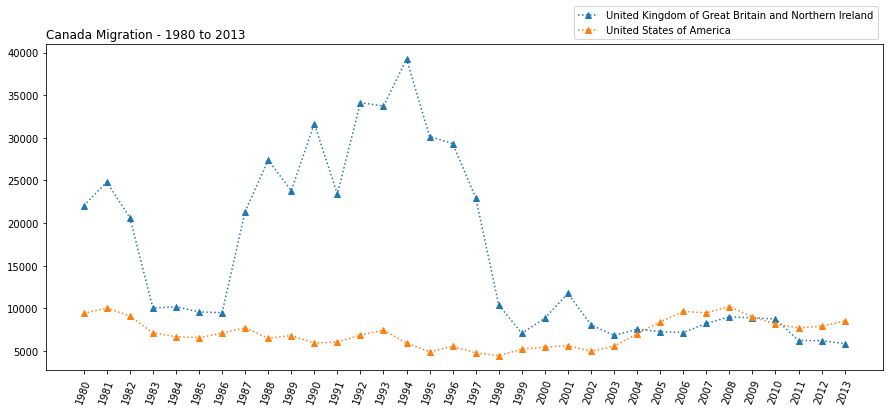

In [467]:
fplot_1(['Kingdom','United St'])

Paises encontrados: ['United States of America']


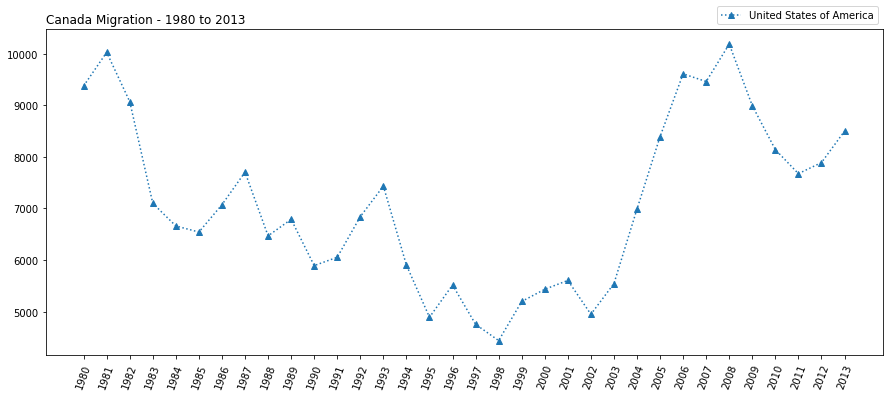

In [468]:
fplot_1(['UNited States'])

Paises encontrados: ['United Arab Emirates']


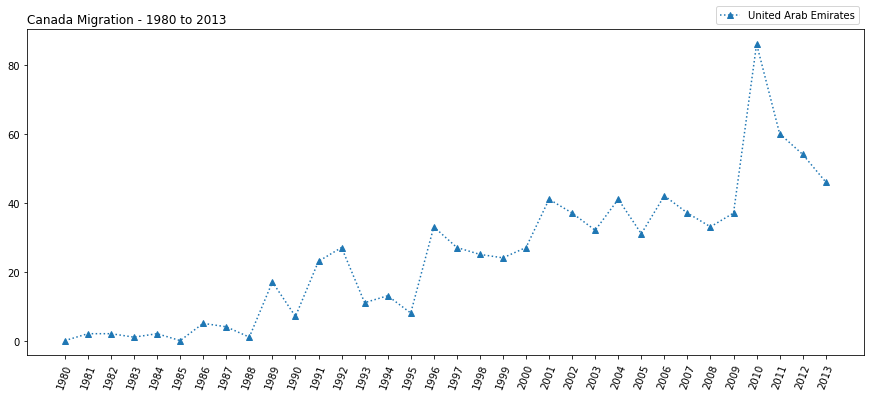

In [469]:
fplot_1(['United Arab Emirates'])

Paises encontrados: ['United Kingdom of Great Britain and Northern Ireland']


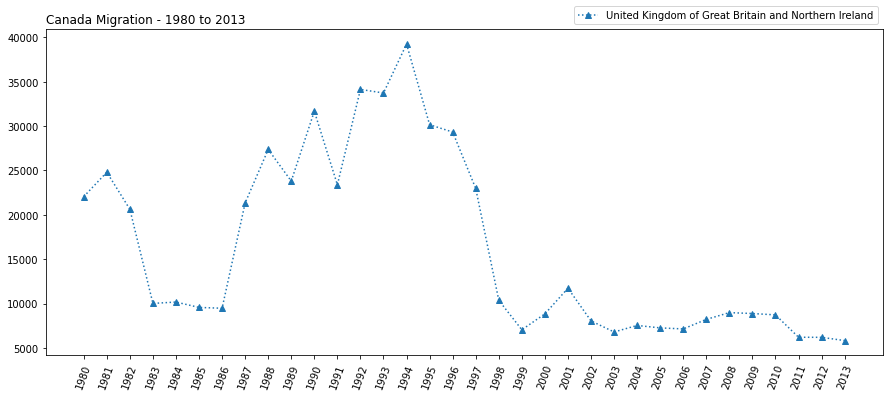

In [470]:
fplot_1(['King'])

Paises encontrados: ['United Arab Emirates', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania', 'United States of America']


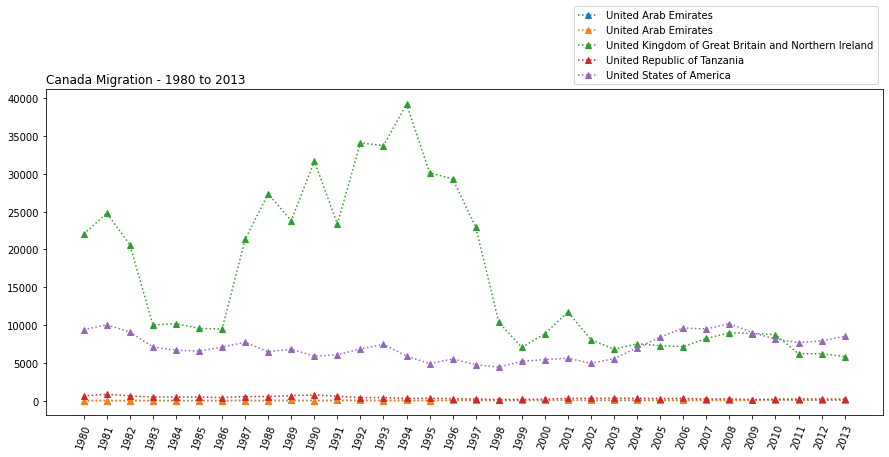

In [472]:
fplot_1(['Emirates','United'])